In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Encontrar o arquivo de dados mais recente
FINAL_DATA_PATH = '../data/final'
try:
    latest_file = sorted([f for f in os.listdir(FINAL_DATA_PATH) if f.startswith('final_dataset')], reverse=True)[0]
    file_path = os.path.join(FINAL_DATA_PATH, latest_file)
    df = pd.read_csv(file_path, parse_dates=['date'])
    print("Dataset carregado com sucesso!")
    print(df.head())
except IndexError:
    print("Nenhum arquivo de dataset final encontrado.")

Dataset carregado com sucesso!
        date      Close  price_change  sentiment_score
0 2025-03-27  35.685551      0.007488              0.0
1 2025-03-28  35.458199     -0.006371              0.0
2 2025-03-31  35.202423     -0.007213              0.0
3 2025-04-01  35.335045      0.003767              0.0
4 2025-04-02  35.240314     -0.002681              0.0


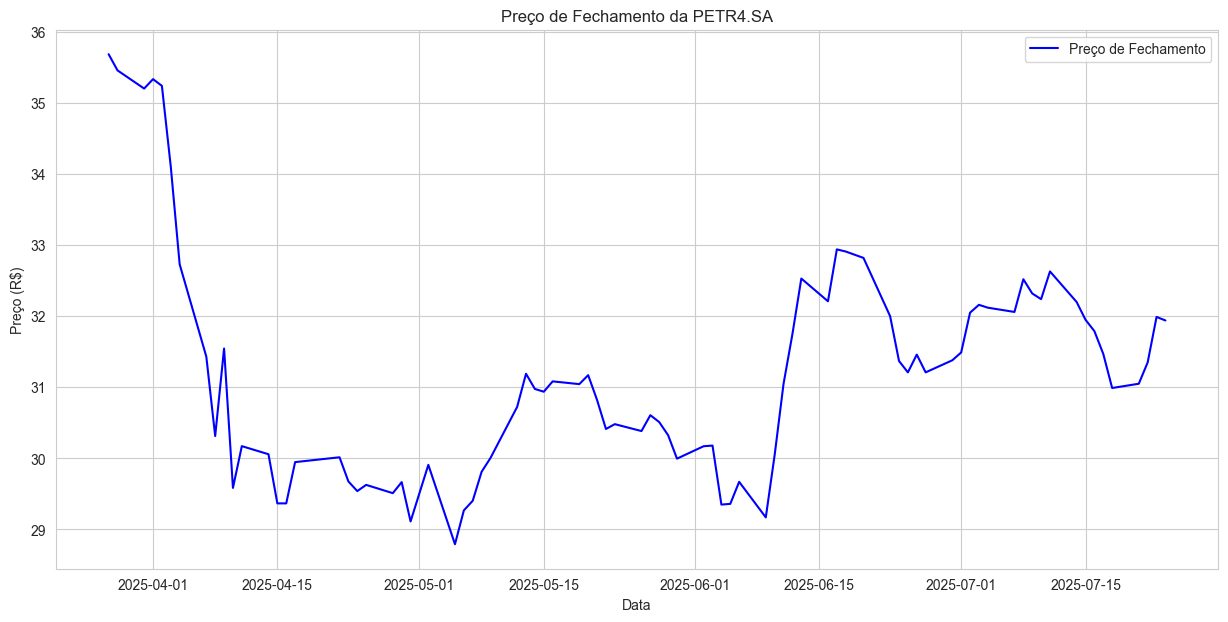

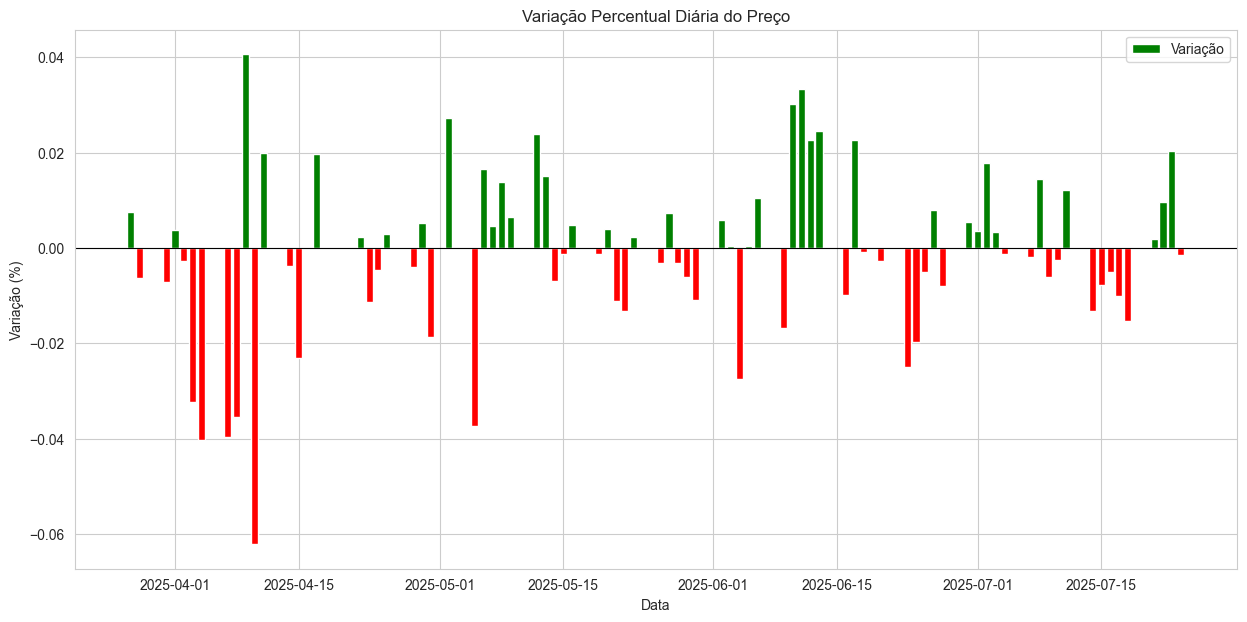

In [5]:
# Gráfico do Preço de Fechamento
plt.figure()
plt.title('Preço de Fechamento da PETR4.SA')
plt.plot(df['date'], df['Close'], label='Preço de Fechamento', color='blue')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()

# Gráfico da Variação Percentual Diária
plt.figure()
plt.title('Variação Percentual Diária do Preço')
plt.bar(df['date'], df['price_change'], label='Variação', color=df['price_change'].apply(lambda x: 'g' if x > 0 else 'r'))
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()

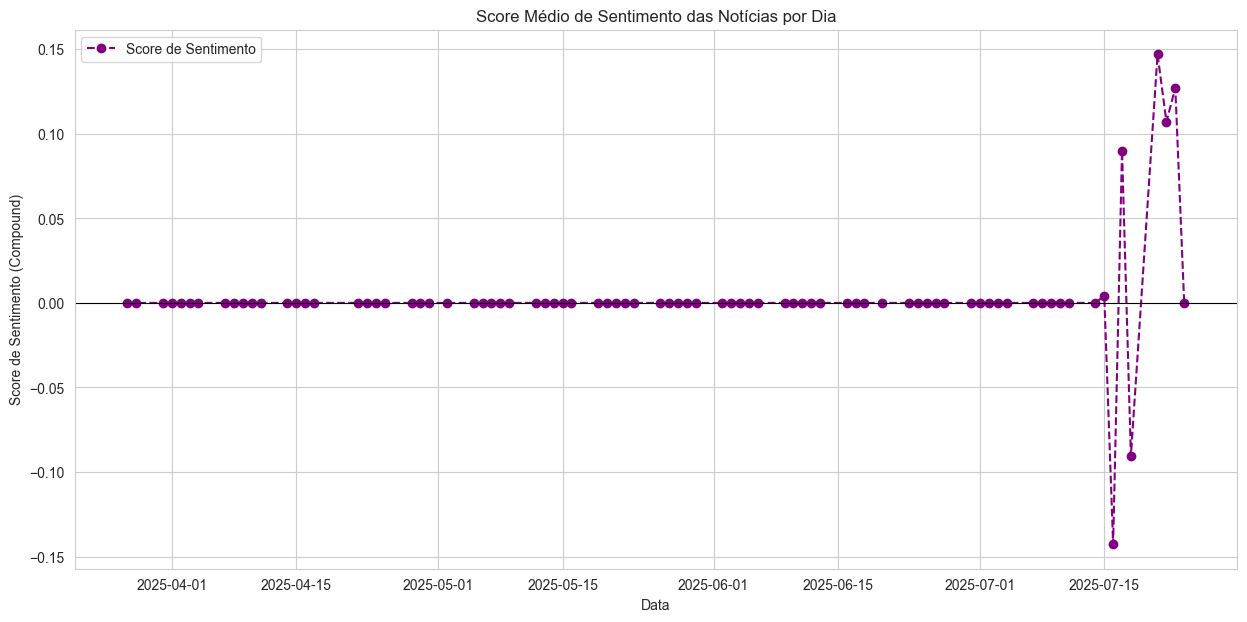

In [6]:
# Gráfico do Score de Sentimento
plt.figure()
plt.title('Score Médio de Sentimento das Notícias por Dia')
plt.plot(df['date'], df['sentiment_score'], label='Score de Sentimento', color='purple', marker='o', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Data')
plt.ylabel('Score de Sentimento (Compound)')
plt.legend()
plt.show()

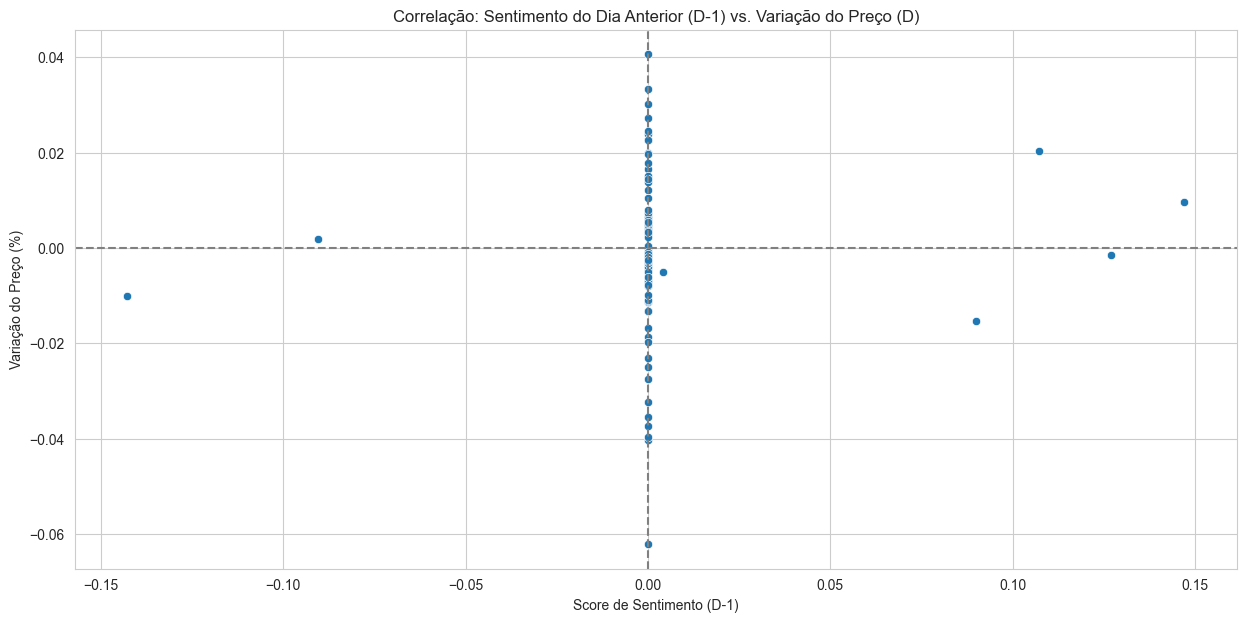

Matriz de Correlação:
                   sentiment_shifted  price_change
sentiment_shifted            1.00000       0.07742
price_change                 0.07742       1.00000


In [7]:
# Gráfico de dispersão: Sentimento vs. Variação de Preço
# Vamos deslocar o sentimento em um dia (shift(1)) para ver se o sentimento de hoje se correlaciona com a variação de amanhã.
df['sentiment_shifted'] = df['sentiment_score'].shift(1)

plt.figure()
sns.scatterplot(data=df, x='sentiment_shifted', y='price_change')
plt.title('Correlação: Sentimento do Dia Anterior (D-1) vs. Variação do Preço (D)')
plt.xlabel('Score de Sentimento (D-1)')
plt.ylabel('Variação do Preço (%)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

# Calcular a correlação numérica
correlation = df[['sentiment_shifted', 'price_change']].corr()
print("Matriz de Correlação:")
print(correlation)